<a href="https://colab.research.google.com/github/Chhavidotcom/house-price-prediction/blob/main/housingassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Chhavidotcom
#house-price-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import files


uploaded = files.upload()


Saving 1553768847_housing.csv to 1553768847_housing.csv


In [4]:
import io
  
df = pd.read_csv(io.BytesIO(uploaded['1553768847_housing.csv']))
print(df)


       longitude  latitude  ...  ocean_proximity  median_house_value
0        -122.23     37.88  ...         NEAR BAY              452600
1        -122.22     37.86  ...         NEAR BAY              358500
2        -122.24     37.85  ...         NEAR BAY              352100
3        -122.25     37.85  ...         NEAR BAY              341300
4        -122.25     37.85  ...         NEAR BAY              342200
...          ...       ...  ...              ...                 ...
20635    -121.09     39.48  ...           INLAND               78100
20636    -121.21     39.49  ...           INLAND               77100
20637    -121.22     39.43  ...           INLAND               92300
20638    -121.32     39.43  ...           INLAND               84700
20639    -121.24     39.37  ...           INLAND               89400

[20640 rows x 10 columns]


In [5]:
pd.DataFrame(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [7]:
df.total_bedrooms.mean()

537.8705525375618

In [8]:
df.total_bedrooms.fillna(round(df.total_bedrooms.mean()),inplace=True)

In [9]:
pd.DataFrame(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:

df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066659,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066659,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values


In [12]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [15]:
# Task1.1: Perform Linear Regression on training data

from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Task1.2: Predict output for test dataset using the fitted model

predictionLinear = linearRegression.predict(X_test)


In [17]:
# Task1.3: Print root mean squared error (RMSE) from Linear Regression

from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear)

Root mean squared error (RMSE) from Linear Regression = 
0.3643079952780686


In [18]:
# Task2.1: Perform Decision Tree Regression on training data

from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
# Task2.2: Predict output for test dataset using the fitted model

predictionDT = DTregressor.predict(X_test)

In [20]:
# Task2.3: Print root mean squared error from Decision Tree Regression

from sklearn.metrics import mean_squared_error
mseDT = mean_squared_error(y_test, predictionDT)
print('Root mean squared error from Decision Tree Regression = ')
print(mseDT)

Root mean squared error from Decision Tree Regression = 
0.3408260154211984


In [21]:
# Task3.1: Perform Random Forest Regression on training data

from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
# Task3.2: Predict output for test dataset using the fitted model

predictionRF = RFregressor.predict(X_test)

In [23]:
# Task3.3: Print root mean squared error from Random Forest Regression

from sklearn.metrics import mean_squared_error
mseRF = mean_squared_error(y_test, predictionRF)
print('Root mean squared error from Random Forest Regression = ')
print(mseRF)

Root mean squared error from Random Forest Regression = 
0.17835926638713048


In [24]:
# Task4.1: Extract just the median_income column from the 
# independent variables (from X_train and X_test)

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

In [25]:
# Task4.2: Perform Linear Regression to predict housing values 
# based on median_income

from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Task4.3: Predict output for test dataset using the fitted model

predictionLinear2 = linearRegression2.predict(X_test_median_income)

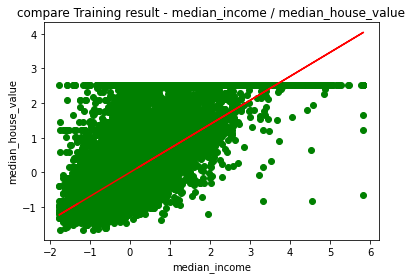

In [27]:
# Task4.4: Plot the fitted model for training data as well as 
# for test data to check if the fitted model satisfies the test data

# Task4.4.1: let us visualize the Training set

plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

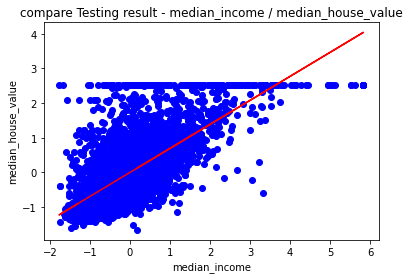

In [28]:
# Task4.4.2: let us visualize the Testing set

plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

## **Happy learning :)**